$$
\begin{array}{c}
\textbf{INTRODUCTION TO CAUSAL INFERENCE}\\\\\\\\
\textbf{Daniela Pinto Veizaga, Xiang Pan, and Xiang Gao} \\
\textit{Center for Data Science, New York University} \\\\\\
\textit{September 6, 2024}
\end{array}
$$


![Causality](https://simons.berkeley.edu/sites/default/files/styles/hero_xxl_1x/public/2023-01/Causality_hi-res.jpg?h=6dcb57f1&itok=5R0Da6OT)


By the end of this lab, you should be able to:

- Distinguish between descriptive and causal questions.
- Apply the all-causes model to represent potential outcomes.
- Identify and estimate causal parameters using real or simulated data.
- Understand the key concepts behind identifying and estimating causal effects, and apply them to practical examples.


In [2]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Descriptive versus Causal Questions

**The Effect of Class Attendance on Grades**

A professor wants to determine whether attending classes regularly improves student grades. We want to distinguish between simply describing the current situation (descriptive) and investigating the causal impact of attendance on grades.

**Notation:**

- $Y_i(s, u)$: The outcome of interest (grades) for student $i$ under potential state $s$ and given all other factors $u$.
- $i$: An individual unit of observation (a student).
- $s$: A potential state of the world (e.g., attending classes regularly or irregularly).
- $u$: All other factors that might influence grades (e.g., study habits, prior knowledge, motivation).

### Descriptive Analysis

We are interested in the current state of the world without manipulating any conditions: _What is the average grade_?

- **Current State (s):** This is the actual state where students have varied levels of class attendance, but we’re not distinguishing between regular and irregular attendance in our analysis.
- **Outcome (Y_i(s, u)):** The grade \(Y_i\) for student \(i\) given their current attendance and other influencing factors \(u\).

So, we simply observe and describe the average grade in the current state of the world.

**Descriptive Analysis Notation:**

\[ \text{Average Grade} = \frac{1}{N} \sum_{i=1}^N Y_i(s, u) \]

where \(s\) is the current attendance status, and \(u\) includes factors like study habits, prior knowledge, etc.


In [12]:
# Setting a random seed for reproducibility
np.random.seed(42)

# Assume we have 300 college students
n = 300

# Simulate current grades (out of 100) in a college course
mean_grade = 75  # Average grade in the course
std_dev = 12  # Standard deviation in grades

# Generate grades for each student
grades = np.random.normal(mean_grade, std_dev, n)
data_descr = pd.DataFrame({
    'Student_ID': np.arange(1, n + 1),
    'Grade': grades
})

Descriptive question: what is the average grade in the course?

In [13]:
# Average grade (descriptive)
avg = data_descr['Grade'].mean()
print(f"The average grade in the course is {avg:.2f}.\n")

The average grade in the course is 74.93.



Causal question: what would be the average grade in the course if students had perfect attendance?

In [14]:
data_descr.head(4)

,Student_ID,Grade
0,1,80.960570
1,2,73.340828
2,3,82.772262
3,4,93.276358


In [15]:
# Let's assume 50% of students regularly attend classes
attendance = np.random.binomial(1, 0.5, n)  # 1 = Regular Attendance, 0 = Irregular Attendance

# Assume regular attendance improves grades by an average of 10 points
attendance_effect = 10

# Simulate grades under the two scenarios: with and without regular attendance
grades_attend = grades + attendance * attendance_effect
grades_withou_attend = grades  # Grades remain the same without regular attendance

# Create a DataFrame to store the data for both scenarios
data_caus = pd.DataFrame({
    'Student_ID': np.arange(1, n + 1),
    'Attendance': attendance,
    'Grade_With_Attendance': grades_attend,
    'Grade_Without_Attendance': grades_withou_attend
})

# Calculate the average grades under both scenarios
average_grade_with_attendance = data_caus[data_caus['Attendance'] == 1]['Grade_With_Attendance'].mean()
average_grade_without_attendance = data_caus[data_caus['Attendance'] == 0]['Grade_Without_Attendance'].mean()

print(f"Causal Question: Average grade without regular attendance: {average_grade_without_attendance:.2f}")
print(f"Causal Question: Average grade with regular attendance: {average_grade_with_attendance:.2f}")

# Estimate the causal effect (difference in average grades)
causal_effect = average_grade_with_attendance - average_grade_without_attendance
print(f"Estimated Causal Effect: Regular attendance improves grades by an average of {causal_effect:.2f} points.\n")


Causal Question: Average grade without regular attendance: 75.67
Causal Question: Average grade with regular attendance: 84.18
Estimated Causal Effect: Regular attendance improves grades by an average of 8.51 points.



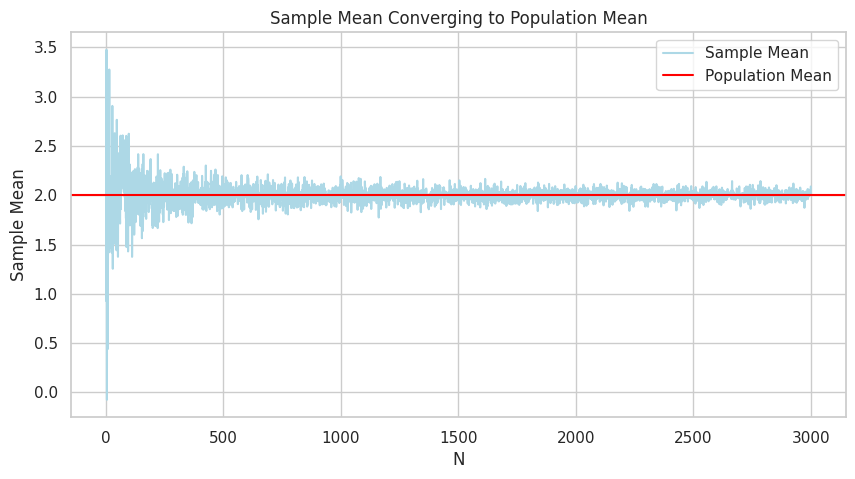

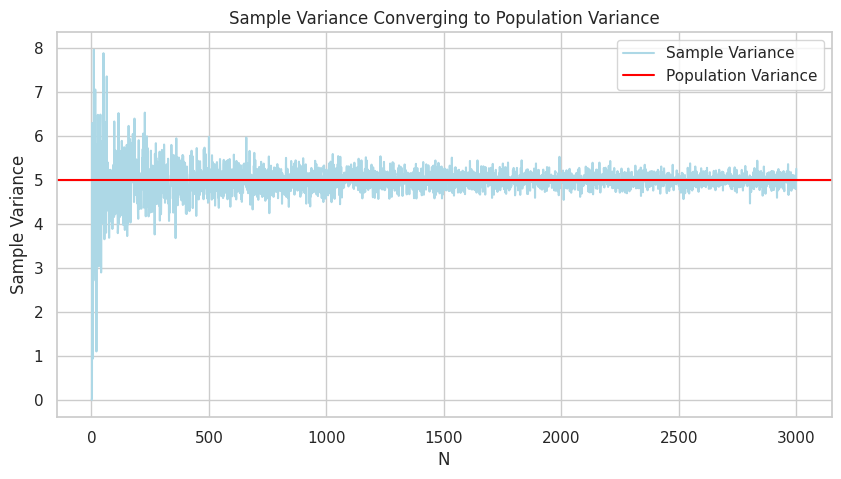

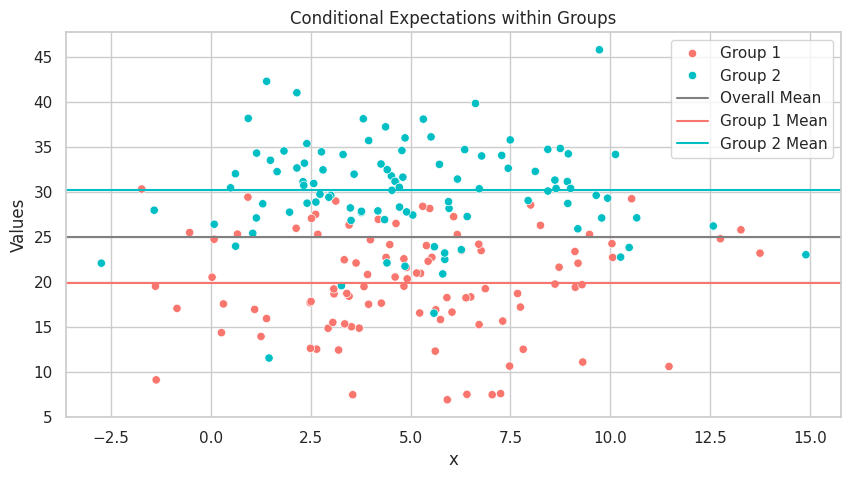

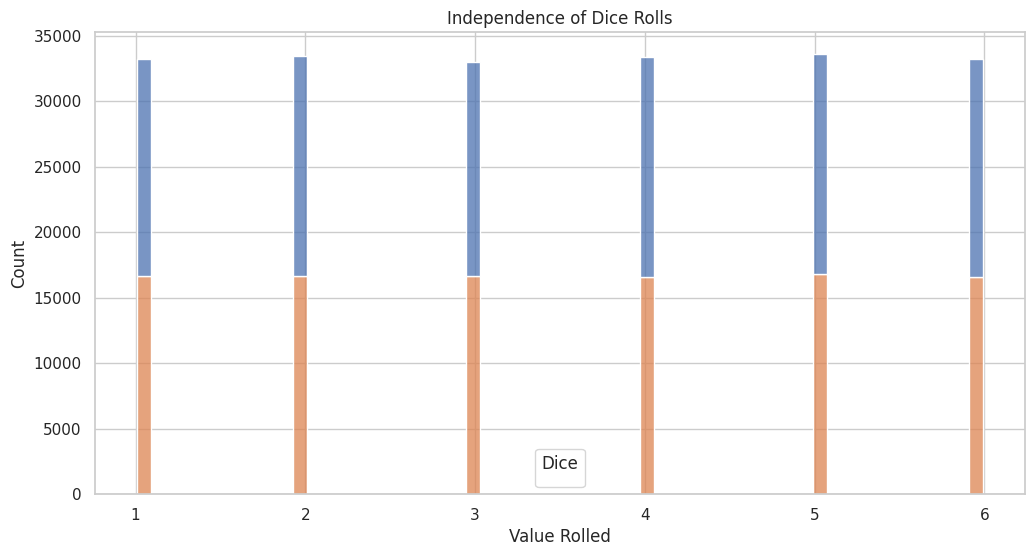

In [ ]:
#Visualizing the Difference Between Descriptive and Causal Analysis

# Plotting the descriptive average grade and the causal average grades under both scenarios
sns.barplot(x=['Current Average Grade (Descriptive)',
               'Irregular Attendance (Causal)',
               'Regular Attendance (Causal)'],
            y=[average_grade, average_grade_without_attendance, average_grade_with_attendance],
            palette='Blues')

plt.title('Descriptive vs. Causal Analysis: Effect of Class Attendance on Grades')
plt.ylabel('Average Grade')
plt.show()
